- Âü∫‰∫é30wÊù°Áª¥Âü∫ÁôæÁßë‰∏≠ÊñáÊï∞ÊçÆËÆ≠ÁªÉÂæóÂà∞word2vecÊ®°Âûã Áî®‰∫éËÆ°ÁÆóËØçËØ≠Áõ∏‰ººÂ∫¶
- Âü∫‰∫élacÂàÜËØçÊ®°ÂûãÁªôÂá∫3.3wÂêçÁî®Êà∑ÁöÑÂàÜËØç‰∏éËØçÊÄßÊ†áÊ≥®ÁªìÊûú
- ÊúÄÁªàÁªôÂá∫ÊØè‰∏™Áî®Êà∑ÁöÑÂÖ¥Ë∂£ÁöÑÊ¶ÇÁéáÈ¢ÑÊµãÂÄº

Áî®Êà∑ËßÑÊ®°3.3w/5.7w

In [1]:
import numpy as np
import pandas as pd
import time
import gensim
from gensim.models import Word2Vec
from tqdm import tqdm

D:\software\anaconda\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


- ÂØºÂÖ•Áî®Êà∑ÂÖ¥Ë∂£Áõ∏ÂÖ≥ËØçÂ∫ì

In [2]:
df_game = pd.read_csv(r'D:\datasets\qianyi\user_label\game_similar.csv')   #‰∏éÊ∏∏ÊàèÁõ∏ÂÖ≥ÁöÑËØçÂ∫ìÔºåËØÑÂàÜÊòØËØ•ÂçïËØç‰∏éÊ∏∏ÊàèÁöÑÁõ∏‰ººÂ∫¶
df_game

game_similar_word     score
0                 Ê∏∏Êàè  1.000000
1                 Áé©ÂÆ∂  0.849507
2                Â∞èÊ∏∏Êàè  0.820626
3                 Ë°óÊú∫  0.813331
4                 Áé©Ê≥ï  0.805901
..               ...       ...
72                Âº∫ËÄÖ  0.412994
73                ÂüüÂêç  0.412396
74                ‰øÆÁúü  0.406966
75                ÁªùÊãõ  0.406827
76                Ê∑¨ÁÇº  0.404587

[77 rows x 2 columns]

In [3]:
# df_game = df_game.append({'game_similar_word':'Ê∏∏Êàè','score':wiki30_model.wv.similarity('Ê∏∏Êàè','Ê∏∏Êàè')},ignore_index=True)
# df_game

In [4]:
df_game.sort_values(by='score',inplace=True,ascending=False)
df_game = df_game.reset_index(drop=True)                        #ÊåâÁÖßÁõ∏‰ººÂ∫¶ÂØπÊ∏∏ÊàèËøõË°åÈôçÂ∫èÊéíÂàó
df_game

game_similar_word     score
0                 Ê∏∏Êàè  1.000000
1                 Áé©ÂÆ∂  0.849507
2                Â∞èÊ∏∏Êàè  0.820626
3                 Ë°óÊú∫  0.813331
4                 Áé©Ê≥ï  0.805901
..               ...       ...
72                Âº∫ËÄÖ  0.412994
73                ÂüüÂêç  0.412396
74                ‰øÆÁúü  0.406966
75                ÁªùÊãõ  0.406827
76                Ê∑¨ÁÇº  0.404587

[77 rows x 2 columns]

In [5]:
df_game.to_csv('game_similar.csv',index=False)

In [6]:
df_tweet = pd.read_csv(r'D:\datasets\data_test\3.3wÁî®Êà∑ÂàÜËØç1kÂÜÖÈùûÁ©∫.csv')  #ÂàÜËØçÁªìÊûúÁî±lacÊ®°ÂûãÂæóÂà∞    
'''
ËØ•Ë°®Ê†ºÊñá‰ª∂ÂåÖÂê´‰∫ÜÂèëÂ∏ñÁî®Êà∑ÁöÑÂ∏ñÂ≠êÁöÑÂàÜËØçÁªìÊûú‰ª•ÂèäËØçÊÄßÁ≠õÈÄâÁöÑÁªìÊûú
'''
df_tweet

Unnamed: 0     user_id  \
0               0  1634847757   
1               1  6121645465   
2               2  5982298619   
3               3  2688638604   
4               4  7267921831   
...           ...         ...   
33785       33785  1860299730   
33786       33786  5608873136   
33787       33787  7592945242   
33788       33788  3805494971   
33789       33789  5515621596   

                                                 content  content_length  \
0        ËßâÈÜíÂπ¥‰ª£yydsÔºÅÔºÅÔºÅÔºÅÔºÅÔºÅ ËßâÈÜíÂπ¥‰ª£ËëõÊ†ëË¥µÁúüÂÆûÁöÑÁªìÂ±ÄËßâÈÜíÂπ¥‰ª£ ËÆ©ÂæàÂ§ö‰∫∫Áü•ÈÅì‰∫Ü‰∏Ä‰∏™‰ªéÊ≤°Âê¨...             999   
1      ÂìàÂìàÂìàÊâãÊú∫Á´ãÂàªÊääÈü≥ÈáèË∞ÉÂ∞è Â¶ÜÊïàÂ•ΩÁæéÂïä Â§™ÂèØÁà±‰∫ÜÂêß Áå™ÂßêÂ§™Áæé‰∫Ü    ÁúãÈ•ø‰∫Ü Âøç‰∏ç‰ΩèÔºÅ  ÁñØÁãÇ...             999   
2      Â∞ëÂπ¥Áªà‰ºöÂèòÊàêÂÖâÔºåÈ£ûÂæÄÊòüËæ∞Â§ßÊµ∑ Êàë‰πüË¶ÅÂä†Ê≤πÔΩû Èì≠ËÆ∞ÔºÅÈì≠ËÆ∞ÂéÜÂè≤ÔºÅÊ∞∏ÊÄÄÂÖàÁÉàÔºåÂêæËæàËá™Âº∫ÔºÅ ÊàëÈÖ∏‰∫Ü Áúü...             999   
3      Ê≤æ ‰∏≠ÂõΩÂÖ±‰∫ßÂÖö100Âπ¥ Âõ†‰∏∫ÂÅö‰∫ÜÂêÉÂäõ‰∏çËÆ®Â•ΩÁöÑ‰∫ãÊÉÖËßâÂæóÂ•ΩÈöæËøáÁù°‰∏çÁùÄÁúºÊ≥™ÈÉΩÊéâ‰∏ãÊù• ÁÑ∂ÂêéÂøòËÆ∞ÊíïÁöÑÂèå...             999   
4      2021Âπ¥Á¨¨26Âë® Êó©:Á∫¢Ë±ÜËñèÁ±≥Á≥ä+Â§±Ë¥•ÁöÑÂéöËõãÁÉßÔºà‰ΩÜÂë≥ÈÅìËÉΩÂêÉÔºâ ‰∏≠:ÁàÜÁÇíÈùûÂ∏∏+Á∫¢ËããËèú+ÈÖ±È∏≠ ...             999   
...                                                  ...             ...   
33785                                                qq                5   
33786                                              ÈÄèÈ£é                  5   
33787                                              Ê©òÂ≠êÂ∑•ÂéÇ                5   
33788                                              ÁéªÁíÉËÇ†ËÉÉ                5   
33789                                               Áè†Êµ∑                 4   

                                             content_seq  \
0      ['  ', 'ËßâÈÜí', 'ËßâÈÜí', 'ËëõÊ†ëË¥µ', 'ÁúüÂÆû', 'ÁªìÂ±Ä', 'ËßâÈÜí', 'Âæà...   
1      ['ÊâãÊú∫', 'Èü≥Èáè', 'Â¶ÜÊïà', 'Â•ΩÁæé', 'Áå™Âßê', '    ', '  ', '...   
2      ['È£ûÂæÄ', 'ÊòüËæ∞', 'Â§ßÊµ∑', 'Âä†Ê≤π', 'Èì≠ËÆ∞', 'Èì≠ËÆ∞', 'ÂéÜÂè≤', 'ÂÖàÁÉà...   
3      ['‰∏≠ÂõΩÂÖ±‰∫ßÂÖö', '100Âπ¥', 'ÂêÉÂäõ‰∏çËÆ®Â•Ω', 'Â•ΩÈöæËøá', 'ÁúºÊ≥™', 'Êéâ‰∏ãÊù•',...   
4      ['2021Âπ¥', 'Á¨¨26Âë®', 'Á∫¢Ë±Ü', 'ËñèÁ±≥Á≥ä+', 'Â§±Ë¥•', 'Âë≥ÈÅì', 'ÁàÜ...   
...                                                  ...   
33785                                       ['  ', 'qq']   
33786                                      ['ÈÄèÈ£é', '   ']   
33787                                       ['Ê©òÂ≠ê', 'Â∑•ÂéÇ']   
33788                                       ['ÁéªÁíÉ', 'ËÇ†ËÉÉ']   
33789                                       ['Áè†Êµ∑', '  ']   

                                          content_select  
0      ['  ', 'ËëõÊ†ëË¥µ', 'ÁªìÂ±Ä', 'ÂæàÂ§ö‰∫∫', 'ËëõÊ†ëË¥µ', 'ÈïøËæõÂ∫ó', '‰∫¨ÈÉä',...  
1      ['ÊâãÊú∫', 'Èü≥Èáè', 'Â¶ÜÊïà', 'Áå™Âßê', '    ', '  ', '  ', '...  
2      ['ÊòüËæ∞', 'Â§ßÊµ∑', 'ÂéÜÂè≤', 'ÂÖàÁÉà', 'ÂêæËæà', 'ÁäØËßÑ', '  ÂÖ±‰∫ßÂÖö', ...  
3      ['‰∏≠ÂõΩÂÖ±‰∫ßÂÖö', 'ÁúºÊ≥™', 'ÂèåÁúºÁöÆË¥¥', 'Â≠¶Âßê', 'ÊØï‰∏öÂÖ∏Á§º', 'ËàçÂèã', 'Ëàç...  
4      ['Á∫¢Ë±Ü', 'ËñèÁ±≥Á≥ä+', 'Âë≥ÈÅì', 'Á∫¢Ë±Ü', 'ËñèÁ±≥', 'Á≥äÂè£ÊÑü', 'ËèúÂçï', ...  
...                                                  ...  
33785                                       ['  ', 'qq']  
33786                                      ['ÈÄèÈ£é', '   ']  
33787                                       ['Ê©òÂ≠ê', 'Â∑•ÂéÇ']  
33788                                       ['ÁéªÁíÉ', 'ËÇ†ËÉÉ']  
33789                                       ['Áè†Êµ∑', '  ']  

[33790 rows x 6 columns]

- ÂØºÂÖ•ËÆ≠ÁªÉÂæóÂà∞ÁöÑword2vecÊ®°ÂûãÔºàÂü∫‰∫é30wÊù°‰∏≠ÊñáËØ≠ÊñôÂ∫ìÔºâ

In [7]:
inp = r'D:\datasets\qianyi\user_label\model\wikich\wikich30w.model'       

In [8]:
wiki30_model = gensim.models.Word2Vec.load(inp)                  #Âä†ËΩΩÈÄöËøá‰∏≠ÊñáÁª¥Âü∫ÁôæÁßëÊï∞ÊçÆÈõÜËÆ≠ÁªÉÂæóÂà∞ÁöÑword2vecÊ®°Âûã

In [9]:
wiki30_model.wv.similar_by_word('ÊóÖÊ∏∏',topn=10)                  #Ê£ÄÈ™åÊ®°ÂûãÁöÑËøêË°åÊïàÊûú

[('travel', 0.7928603887557983),
 ('ÊóÖË°åÂõ¢', 0.7741164565086365),
 ('bhogle', 0.7676228284835815),
 ('Ëá™È©æÊ∏∏', 0.7594654560089111),
 ('‰∏çÊÄùÊ∫¢', 0.7434412837028503),
 ('ÂàòÂπ∏Èí∞', 0.7415870428085327),
 ('Ëá™Âä©Ê∏∏', 0.7403112649917603),
 ('È¶ôÊ∏ØÊ∏∏', 0.7395221590995789),
 ('ÂØºÊ∏∏', 0.7391347289085388),
 ('ÂêäÈù¥', 0.7387250065803528)]

In [10]:
len(wiki30_model.wv.index_to_key)                                #ËÆ≠ÁªÉÂæóÂà∞Word2vecÊ®°ÂûãÁöÑËØçÂêëÈáèÁöÑ‰∏™Êï∞

1145213

In [11]:
wiki30_model.wv.similarity('Ê∏∏Êàè','Ê∏∏Êàè')             #Ê£ÄÈ™å‰∏§‰∏™ËØçËØ≠ÁöÑÁõ∏‰ººÂ∫¶

0.99999994

In [12]:
wiki30_model.wv.similarity('Ê∏∏Êàè','ÁΩëÊ∏∏')

0.6040925

In [13]:
wiki30_model.wv.similarity('Ê∏∏Êàè','ÂàÄÂ°î')

0.64694154

In [14]:
wiki30_model.wv.similarity('ÊóÖÊ∏∏','Ê∏∏Êàè')

0.36551937

## Áî®Êà∑ÂØπÊ∏∏ÊàèÂÖ¥Ë∂£ÂÄºÁöÑÂ°´ÂÖÖ 

### ËÆ°ÁÆóÁ¨¨‰∏Ä‰∏™Áî®Êà∑‰∏é'Ê∏∏Êàè'ÁöÑÁõ∏ÂÖ≥Â∫¶

In [15]:
start_time = time.time()

a = 0
interest_score = []
interest_related = 0
for i in range(len(eval(df_tweet['content_select'][a]))):          
    try:
        b = wiki30_model.wv.similarity('Ê∏∏Êàè',eval(df_tweet['content_select'][a])[i])
        interest_score.append(b) 
        i += 1
        interest_related += 1
    except KeyError:                                 #ÂºÇÂ∏∏ÊéíÈô§ÔºåÂ§ÑÁêÜÂàÜËØçÁªìÊûú‰∏çÂú®word2vecÊ®°Âûã‰∏≠ÁöÑÊÉÖÂÜµ
        interest_score.append(0)
print(interest_score)
print(interest_related)
if interest_related==0:
    print(0)
else:
    print(np.sum(interest_score)/interest_related)    #ËøîÂõûËØ•Êã•Êä§Â∏ñÂ≠êÊâÄÊúâÂàÜËØçÁªìÊûú‰∏éÊåáÂÆöÊ∏∏ÊàèËØçÂ∫ìËØçËØ≠‰πãÈó¥Áõ∏‰ººÂ∫¶ÁöÑÂπ≥ÂùáÂÄº
    
end_time = time.time()
print(end_time-start_time)

[0, 0.413764, 0.62061274, 0, 0.413764, 0.26177925, 0.22974147, 0.50841236, 0.4447105, 0.413764, 0, 0.65017486, 0.3409029, 0.36179516, 0.53946805, 0, 0.28277388, 0, 0.423218, 0.23923951, 0.23923951, 0.36339077, 0.413764, 0.62061274, 0, 0.413764, 0.26177925, 0.22974147, 0.50841236, 0.4447105, 0.413764, 0, 0.65017486, 0.3409029, 0.36179516, 0.53946805, 0, 0.3728673, 0, 0.251904, 0, 0, 0, 0.44344985, 0.23083133, 0.26461813, 0.3492052, 0.44344985, 0, 0, 0.35675427, 0.53295934, 0.32416043, 0.32013863, 0.21019952, 0.51905656, 0.32013863, 0.21019952, 0.37292486, 0, 0.17181809, 0.32013863, 0.21019952, 0.37292486, 0.5340041, 0, 0.35910168, 0.3577612, 0.3577612, 0.3121087, 0.36180675, 0.27638018, 0, 0.3577612, 0.28997612, 0.36554605, 0.31375492, 0.30906555, 0.35910168, 0.30906555, 0.3577612, 0.36180675, 0.2857421, 0.19953844, 0.21663427, 0.26751655, 0.5203234, 0, 0.25010204, 0.37125742, 0.29114524, 0.34888473, 0, 0.42540175, 0.25819698, 0.29114524, 0.15878215, 0.36922193, 0.15878215, 0.2032544, 0

### ËÆ°ÁÆóÁ¨¨‰∏Ä‰∏™Áî®Êà∑ÂØπ‚ÄòÊ∏∏Êàè‚ÄôÁöÑÂÖ¥Ë∂£ÂÄº 

In [16]:
def interest_game_one(x,y=0):              #x‰∏∫Á¨¨x+1‰∏™user,y‰∏∫ËØçÂ∫ìÁöÑÁ¨¨y+1‰∏™ÂçïËØç
    interest_score = []
    interest_related = 0
    for i in range(len(eval(df_tweet['content_select'][x]))):
        try:
            a = wiki30_model.wv.similarity(eval(df_tweet['content_select'][x])[i],
                                           df_game['game_similar_word'][y])
            interest_score.append(a)
            i += 1
            interest_related += 1
        except KeyError:
            interest_score.append(0)
    if interest_related == 0:
        return 0
    else:
        return np.sum(interest_score)/interest_related  
    
# def interest_game_stock(x):
#     game_similar_score = []
#     num = 0
#     for i in range(len(df_game['game_similar_word'])):
#         game_score = interest_game_one(x,i)
#         game_similar_score.append(game_score)
#         if game_score != 0:
#             num+=1   
#     return np.sum(game_similar_score)/num
#     return np.sum(game_similar_score)/num,game_similar_score,num
#     print(game_similar_score)
#     print(num)
#     print(np.sum(game_similar_score)/num)
   

In [17]:
interest_game_one(0)             #Á¨¨‰∏Ä‰∏™Áî®Êà∑Â∏ñÂ≠êÂàÜËØçÁªìÊûú‰∏é'Ê∏∏Êàè'ÁöÑÁõ∏‰ººÂ∫¶

0.3601824895155673

In [18]:
def interest_game_stock(x):
    interest_score = []
    num = 0
    for i in range(len(eval(df_tweet['content_select'][x]))):
        for j in range(len(df_game['game_similar_word'])):
            try:
                a = wiki30_model.wv.similarity(eval(df_tweet['content_select'][x])[i],
                                           df_game['game_similar_word'][j])
                interest_score.append(a)
                j += 1
                num += 1
            except KeyError:
                interest_score.append(0)
        i += 1
    if num == 0:
        return 0
    else:
        return np.sum(interest_score)/num
#         return np.sum(interest_score)/num,interest_score,num


In [36]:
interest_game_stock(0)             #Á¨¨‰∏Ä‰∏™Áî®Êà∑Â∏ñÂ≠êÂàÜËØçÁªìÊûú‰∏éÊ∏∏ÊàèËØçÂ∫ìÁöÑÁõ∏‰ººÂ∫¶

0.31103947166607215

In [19]:
start_time = time.time()
print(interest_game_stock(0))
end_time = time.time()
print(end_time-start_time) 

0.31103947166607215
1.555513620376587


In [20]:
interest_game_one(3,2)             #Á¨¨4‰∏™Áî®Êà∑ÁöÑÂ∏ñÂ≠êÂàÜËØçÁªìÊûú‰∏éËØçÂ∫ìÁ¨¨‰∏â‰∏™ËØçËØ≠ÁöÑÁõ∏‰ººÂ∫¶

0.3558867376739696

In [21]:
interest_game_stock(4)

0.32799788599277474

In [22]:
start_time = time.time()
print(interest_game_stock(90))
end_time = time.time()
print(end_time-start_time)

0.3222143245326889
0.9771006107330322


In [23]:
start_time = time.time()
print(interest_game_stock(1236))
end_time = time.time()
print(end_time-start_time)

0.3255904887651038
0.4786052703857422


In [24]:
start_time = time.time()
print(interest_game_stock(384))
end_time = time.time()
print(end_time-start_time)

0.32519917286102673
0.727733850479126


In [25]:
len(eval(df_tweet['content_select'][1236]))         #Á¨¨1237‰∏™Áî®Êà∑ÁöÑÂàÜËØçÊï∞ÁõÆ

58

In [37]:
len(df_tweet)                                       #Áî®Êà∑ÊÄªÊï∞ÁõÆ

33790

In [40]:
from tqdm import tqdm
import time
start_time = time.time()

game_interest_value = []

for i in tqdm(range(len(df_tweet)),desc='demo: '):
    game_interest_value.append(interest_game_stock(i))
print(game_interest_value)                          #Áî±‰∏äËø∞ÂáΩÊï∞ÁªôÂá∫Áî®Êà∑ÂØπÊ∏∏ÊàèÁöÑÂÖ¥Ë∂£Â∫¶È¢ÑÊµãÂÄº

end_time = time.time()
print(end_time-start_time)
# df_tweet['game_interest_value'] = pd.Series([interest_game_stock(i)\
#                                             for i in tqdm(range(len(df_tweet)),desc='demo: ')])
# print(df_tweet['game_interest_value'])


demo:   0%|‚ñè                                                                      | 66/33790 [00:47<9:54:23,  1.06s/it]


demo:   0%|‚ñé                                                                     | 132/33790 [01:30<5:45:57,  1.62it/s]


demo:   1%|‚ñç                                                                     | 198/33790 [02:09<4:31:10,  2.06it/s]


demo:   1%|‚ñå                                                                    | 265/33790 [02:55<11:48:25,  1.27s/it]


demo:   1%|‚ñã                                                                    | 332/33790 [03:44<10:56:18,  1.18s/it]


demo:   1%|‚ñä                                                                     | 399/33790 [04:24<5:39:51,  1.64it/s]


demo:   1%|‚ñâ                                                                     | 465/33790 [05:05<4:47:54,  1.93it/s]


demo:   2%|‚ñà                                                                     | 531/33790 [05:43<4:16:04,  2.16it/s]


demo:   2%|‚ñà‚ñè                                                                    | 599/33790 [06:30<6:20:38,  1.45it/s]


demo:   2%|‚ñà‚ñç                                                                    | 665/33790 [07:05<3:23:45,  2.71it/s]


demo:   2%|‚ñà‚ñå                                                                    | 732/33790 [07:47<5:09:43,  1.78it/s]


demo:   2%|‚ñà‚ñã                                                                    | 798/33790 [08:29<8:10:22,  1.12it/s]


demo:   3%|‚ñà‚ñä                                                                    | 865/33790 [09:04<4:41:19,  1.95it/s]


demo:   3%|‚ñà‚ñâ                                                                    | 932/33790 [09:41<3:39:12,  2.50it/s]


demo:   3%|‚ñà‚ñà                                                                   | 1000/33790 [10:15<5:08:11,  1.77it/s]


demo:   3%|‚ñà‚ñà‚ñè                                                                  | 1068/33790 [10:58<5:55:30,  1.53it/s]


demo:   3%|‚ñà‚ñà‚ñé                                                                  | 1134/33790 [11:39<5:43:32,  1.58it/s]


demo:   4%|‚ñà‚ñà‚ñç                                                                  | 1203/33790 [12:12<4:25:32,  2.05it/s]


demo:   4%|‚ñà‚ñà‚ñå                                                                  | 1271/33790 [12:46<3:05:51,  2.92it/s]


demo:   4%|‚ñà‚ñà‚ñã                                                                  | 1338/33790 [13:23<4:46:05,  1.89it/s]


demo:   4%|‚ñà‚ñà‚ñä                                                                  | 1405/33790 [14:00<3:53:33,  2.31it/s]


demo:   4%|‚ñà‚ñà‚ñà                                                                  | 1473/33790 [14:36<6:20:46,  1.41it/s]


demo:   5%|‚ñà‚ñà‚ñà‚ñè                                                                 | 1539/33790 [15:11<5:46:18,  1.55it/s]


demo:   5%|‚ñà‚ñà‚ñà‚ñé                                                                 | 1609/33790 [15:45<5:59:40,  1.49it/s]


demo:   5%|‚ñà‚ñà‚ñà‚ñç                                                                 | 1675/33790 [16:21<4:24:46,  2.02it/s]


demo:   5%|‚ñà‚ñà‚ñà‚ñå                                                                 | 1742/33790 [16:55<3:45:39,  2.37it/s]


demo:   5%|‚ñà‚ñà‚ñà‚ñå                                                               | 1810/33790 [21:44<239:34:59, 26.97s/it]


demo:   6%|‚ñà‚ñà‚ñà‚ñä                                                                 | 1878/33790 [22:16<3:24:43,  2.60it/s]


demo:   6%|‚ñà‚ñà‚ñà‚ñâ                                                                 | 1945/33790 [22:55<4:42:03,  1.88it/s]


demo:   6%|‚ñà‚ñà‚ñà‚ñà                                                                 | 2012/33790 [23:33<4:22:23,  2.02it/s]


demo:   6%|‚ñà‚ñà‚ñà‚ñà‚ñè                                                                | 2080/33790 [24:06<5:20:19,  1.65it/s]


demo:   6%|‚ñà‚ñà‚ñà‚ñà‚ñç                                                                | 2148/33790 [24:39<3:05:04,  2.85it/s]


demo:   7%|‚ñà‚ñà‚ñà‚ñà‚ñå                                                                | 2214/33790 [25:08<3:49:11,  2.30it/s]


demo:   7%|‚ñà‚ñà‚ñà‚ñà‚ñã                                                                | 2284/33790 [25:37<4:00:16,  2.19it/s]


demo:   7%|‚ñà‚ñà‚ñà‚ñà‚ñä                                                                | 2352/33790 [26:08<2:46:53,  3.14it/s]


demo:   7%|‚ñà‚ñà‚ñà‚ñà‚ñâ                                                                | 2419/33790 [26:39<3:58:40,  2.19it/s]


demo:   7%|‚ñà‚ñà‚ñà‚ñà‚ñà                                                                | 2485/33790 [27:03<2:33:47,  3.39it/s]


demo:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                               | 2554/33790 [27:35<5:27:04,  1.59it/s]


demo:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                               | 2622/33790 [28:02<3:11:35,  2.71it/s]


demo:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                               | 2688/33790 [28:29<3:14:22,  2.67it/s]


demo:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                               | 2757/33790 [28:57<2:54:35,  2.96it/s]


demo:   8%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                               | 2825/33790 [29:26<3:15:03,  2.65it/s]


demo:   9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                               | 2893/33790 [29:52<3:52:22,  2.22it/s]


demo:   9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                               | 2960/33790 [30:19<4:03:01,  2.11it/s]


demo:   9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                              | 3027/33790 [30:47<3:18:03,  2.59it/s]


demo:   9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                              | 3097/33790 [31:17<5:22:05,  1.59it/s]


demo:   9%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                              | 3165/33790 [31:42<3:35:22,  2.37it/s]


demo:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                              | 3233/33790 [32:14<4:02:38,  2.10it/s]


demo:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                              | 3303/33790 [32:40<3:05:34,  2.74it/s]


demo:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                              | 3371/33790 [33:04<2:28:22,  3.42it/s]


demo:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                              | 3439/33790 [33:28<1:56:30,  4.34it/s]


demo:  10%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                             | 3509/33790 [33:49<2:25:38,  3.47it/s]


demo:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                             | 3577/33790 [34:12<2:44:22,  3.06it/s]


demo:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                             | 3646/33790 [34:35<2:26:49,  3.42it/s]


demo:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                             | 3713/33790 [34:55<2:55:14,  2.86it/s]


demo:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                             | 3780/33790 [35:21<2:44:14,  3.05it/s]


demo:  11%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                             | 3850/33790 [35:44<3:09:39,  2.63it/s]


demo:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                             | 3916/33790 [36:05<2:23:43,  3.46it/s]


demo:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                            | 3987/33790 [36:26<3:14:30,  2.55it/s]


demo:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                            | 4053/33790 [36:48<2:40:53,  3.08it/s]


demo:   0%|‚ñè                                                                 | 126/33790 [1:36:37<430:16:16, 46.01s/it]

demo:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                            | 4120/33790 [37:41<2:22:28,  3.47it/s]


demo:  12%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                            | 4188/33790 [38:02<2:40:23,  3.08it/s]


demo:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                            | 4258/33790 [38:24<2:11:28,  3.74it/s]


demo:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                            | 4327/33790 [38:43<2:03:05,  3.99it/s]


demo:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                            | 4399/33790 [39:03<2:01:23,  4.04it/s]


demo:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                           | 4470/33790 [39:21<2:22:39,  3.43it/s]


demo:  13%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                           | 4539/33790 [39:41<1:53:03,  4.31it/s]


demo:  14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                           | 4609/33790 [40:01<1:47:37,  4.52it/s]


demo:  14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                           | 4680/33790 [40:20<2:04:36,  3.89it/s]


demo:  14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                           | 4752/33790 [40:41<3:25:01,  2.36it/s]


demo:  14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                           | 4819/33790 [41:02<2:24:43,  3.34it/s]


demo:  14%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                           | 4888/33790 [41:21<2:05:47,  3.83it/s]


demo:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                           | 4957/33790 [41:43<2:11:19,  3.66it/s]


demo:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                          | 5027/33790 [42:01<1:52:34,  4.26it/s]


demo:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                          | 5097/33790 [42:23<2:48:09,  2.84it/s]


demo:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                          | 5167/33790 [42:41<1:50:44,  4.31it/s]


demo:  15%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                          | 5236/33790 [43:01<2:26:10,  3.26it/s]


demo:  16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                          | 5306/33790 [43:18<2:03:20,  3.85it/s]


demo:  16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                          | 5380/33790 [43:35<1:35:30,  4.96it/s]


demo:  16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                         | 5454/33790 [43:52<2:26:40,  3.22it/s]


demo:  16%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                         | 5527/33790 [44:10<1:34:39,  4.98it/s]


demo:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                         | 5598/33790 [44:28<1:34:19,  4.98it/s]


demo:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                         | 5670/33790 [44:46<2:57:19,  2.64it/s]


demo:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                         | 5751/33790 [45:04<1:49:31,  4.27it/s]


demo:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                         | 5824/33790 [45:21<1:58:25,  3.94it/s]


demo:  17%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                         | 5901/33790 [45:38<1:19:06,  5.88it/s]


demo:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                        | 5973/33790 [45:56<2:15:24,  3.42it/s]


demo:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                        | 6044/33790 [46:13<2:19:41,  3.31it/s]


demo:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                        | 6117/33790 [46:29<2:09:44,  3.55it/s]


demo:  18%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                        | 6191/33790 [46:46<1:37:58,  4.69it/s]


demo:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                        | 6263/33790 [47:04<1:46:50,  4.29it/s]


demo:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                        | 6332/33790 [47:18<1:01:49,  7.40it/s]


demo:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                        | 6401/33790 [47:35<2:26:55,  3.11it/s]


demo:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                       | 6475/33790 [47:50<2:14:59,  3.37it/s]


demo:  19%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                       | 6548/33790 [48:05<2:12:51,  3.42it/s]


demo:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                       | 6618/33790 [48:19<1:28:52,  5.10it/s]


demo:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                       | 6694/33790 [48:35<1:48:36,  4.16it/s]


demo:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                       | 6770/33790 [48:51<2:17:32,  3.27it/s]


demo:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                       | 6844/33790 [49:06<1:50:34,  4.06it/s]


demo:  20%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                      | 6918/33790 [49:20<1:19:05,  5.66it/s]


demo:  21%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                      | 6999/33790 [49:35<1:25:46,  5.21it/s]


demo:  21%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                      | 7077/33790 [49:50<1:22:32,  5.39it/s]


demo:  21%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                      | 7153/33790 [50:04<1:03:47,  6.96it/s]


demo:  21%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                      | 7234/33790 [50:18<1:31:05,  4.86it/s]


demo:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                      | 7311/33790 [50:33<1:09:23,  6.36it/s]


demo:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                      | 7389/33790 [50:46<1:32:26,  4.76it/s]


demo:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                     | 7467/33790 [51:00<1:02:38,  7.00it/s]


demo:  22%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                     | 7537/33790 [51:14<1:58:43,  3.69it/s]


demo:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                     | 7617/33790 [51:27<1:26:41,  5.03it/s]


demo:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                     | 7699/33790 [51:40<1:11:07,  6.11it/s]


demo:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                     | 7779/33790 [51:56<1:25:47,  5.05it/s]


demo:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                     | 7854/33790 [52:10<1:13:33,  5.88it/s]


demo:  23%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                      | 7930/33790 [52:22<54:53,  7.85it/s]


demo:  24%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                    | 8014/33790 [52:36<1:05:10,  6.59it/s]


demo:  24%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                    | 8095/33790 [52:51<1:24:41,  5.06it/s]


demo:  24%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                    | 8173/33790 [53:06<1:16:50,  5.56it/s]


demo:  24%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                    | 8251/33790 [53:20<1:12:10,  5.90it/s]


demo:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                     | 8335/33790 [53:33<57:15,  7.41it/s]


demo:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                   | 8422/33790 [53:47<1:12:24,  5.84it/s]


demo:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                   | 8506/33790 [54:00<1:05:35,  6.42it/s]


demo:  25%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                     | 8585/33790 [54:12<59:46,  7.03it/s]


demo:  26%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                   | 8667/33790 [54:24<1:13:51,  5.67it/s]


demo:  26%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                                    | 8745/33790 [54:37<56:58,  7.33it/s]


demo:  26%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                    | 8828/33790 [54:50<45:36,  9.12it/s]


demo:  26%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                    | 8915/33790 [55:03<59:17,  6.99it/s]


demo:  27%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                    | 9001/33790 [55:15<42:22,  9.75it/s]


demo:  27%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                   | 9107/33790 [55:29<49:27,  8.32it/s]


demo:  27%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                  | 9198/33790 [55:42<1:01:24,  6.67it/s]


demo:  27%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                  | 9287/33790 [55:54<1:06:45,  6.12it/s]


demo:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                   | 9391/33790 [56:06<33:47, 12.03it/s]


demo:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                   | 9493/33790 [56:19<51:27,  7.87it/s]


demo:  28%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                                  | 9582/33790 [56:31<39:58, 10.09it/s]


demo:  29%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                 | 9678/33790 [56:44<1:10:28,  5.70it/s]


demo:  29%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                  | 9783/33790 [56:57<49:41,  8.05it/s]


demo:  29%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                  | 9884/33790 [57:09<51:32,  7.73it/s]


demo:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                                 | 10001/33790 [57:22<40:08,  9.88it/s]


demo:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                               | 10103/33790 [57:36<1:05:50,  6.00it/s]


demo:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                                 | 10192/33790 [57:48<40:13,  9.78it/s]


demo:  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                                | 10290/33790 [58:01<53:42,  7.29it/s]


demo:  31%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                                | 10394/33790 [58:13<41:33,  9.38it/s]


demo:  31%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                                | 10506/33790 [58:25<38:40, 10.03it/s]


demo:  31%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                                | 10608/33790 [58:37<47:55,  8.06it/s]


demo:  32%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                               | 10713/33790 [58:50<49:29,  7.77it/s]


demo:  32%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                               | 10820/33790 [59:02<34:24, 11.13it/s]


demo:  32%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                               | 10925/33790 [59:15<52:32,  7.25it/s]


demo:  33%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                               | 11037/33790 [59:27<34:51, 10.88it/s]


demo:  33%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                               | 11155/33790 [59:40<37:38, 10.02it/s]


demo:  33%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                              | 11255/33790 [59:53<47:26,  7.92it/s]


demo:  34%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                             | 11380/33790 [1:00:06<36:58, 10.10it/s]


demo:  34%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                            | 11498/33790 [1:00:18<54:17,  6.84it/s]


demo:  34%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                            | 11623/33790 [1:00:31<38:38,  9.56it/s]


demo:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                            | 11755/33790 [1:00:44<37:01,  9.92it/s]


demo:  35%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                            | 11890/33790 [1:00:56<28:19, 12.89it/s]


demo:  36%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                           | 12024/33790 [1:01:08<39:31,  9.18it/s]


demo:  36%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                           | 12161/33790 [1:01:21<41:38,  8.66it/s]


demo:  36%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                           | 12297/33790 [1:01:33<24:42, 14.50it/s]


demo:  37%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                           | 12437/33790 [1:01:46<37:58,  9.37it/s]


demo:  37%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                          | 12582/33790 [1:01:58<30:33, 11.56it/s]


demo:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                          | 12719/33790 [1:02:09<25:11, 13.94it/s]


demo:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                          | 12856/33790 [1:02:21<26:57, 12.94it/s]


demo:  38%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                         | 12993/33790 [1:02:33<41:42,  8.31it/s]


demo:  39%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                         | 13135/33790 [1:02:45<27:35, 12.47it/s]


demo:  39%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                         | 13276/33790 [1:02:57<35:41,  9.58it/s]


demo:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                         | 13411/33790 [1:03:10<30:10, 11.26it/s]


demo:  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                        | 13551/33790 [1:03:21<35:38,  9.46it/s]


demo:  41%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                        | 13691/33790 [1:03:33<27:41, 12.10it/s]


demo:  41%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                        | 13830/33790 [1:03:45<41:01,  8.11it/s]


demo:  41%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                        | 13956/33790 [1:03:56<33:58,  9.73it/s]


demo:  42%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                                       | 14093/33790 [1:04:08<30:02, 10.93it/s]


demo:  42%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                                       | 14237/33790 [1:04:19<29:51, 10.92it/s]


demo:  43%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                       | 14388/33790 [1:04:30<25:11, 12.84it/s]


demo:  43%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                      | 14526/33790 [1:04:41<25:11, 12.75it/s]


demo:  43%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                      | 14676/33790 [1:04:52<20:58, 15.19it/s]


demo:  44%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                      | 14838/33790 [1:05:03<19:35, 16.12it/s]


demo:  44%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                     | 14985/33790 [1:05:13<24:45, 12.66it/s]


demo:  45%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                     | 15151/33790 [1:05:25<26:45, 11.61it/s]


demo:  45%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                     | 15304/33790 [1:05:36<21:54, 14.07it/s]


demo:  46%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                     | 15454/33790 [1:05:45<21:09, 14.44it/s]


demo:  46%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                    | 15612/33790 [1:05:56<17:46, 17.04it/s]


demo:  47%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                    | 15783/33790 [1:06:06<14:01, 21.41it/s]


demo:  47%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                    | 15957/33790 [1:06:16<18:14, 16.29it/s]


demo:  48%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                   | 16124/33790 [1:06:26<15:29, 19.00it/s]


demo:  48%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                   | 16301/33790 [1:06:35<21:32, 13.53it/s]


demo:  49%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                  | 16491/33790 [1:06:45<18:08, 15.89it/s]


demo:  49%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                  | 16700/33790 [1:06:56<15:43, 18.11it/s]


demo:  50%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                                  | 16885/33790 [1:07:06<15:23, 18.30it/s]


demo:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                                 | 17101/33790 [1:07:16<15:51, 17.54it/s]


demo:  51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                                 | 17302/33790 [1:07:26<15:06, 18.20it/s]


demo:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                                | 17505/33790 [1:07:36<14:46, 18.38it/s]


demo:  52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                                | 17696/33790 [1:07:47<12:47, 20.96it/s]


demo:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                                | 17922/33790 [1:07:56<09:46, 27.07it/s]


demo:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                               | 18143/33790 [1:08:06<09:30, 27.42it/s]


demo:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                               | 18361/33790 [1:08:15<13:23, 19.21it/s]


demo:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                              | 18584/33790 [1:08:24<09:30, 26.66it/s]


demo:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                              | 18808/33790 [1:08:33<09:03, 27.57it/s]


demo:  56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                             | 19059/33790 [1:08:43<07:16, 33.74it/s]


demo:  57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                             | 19315/33790 [1:08:52<10:04, 23.95it/s]


demo:  58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                            | 19580/33790 [1:09:01<07:24, 32.00it/s]


demo:  59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                            | 19840/33790 [1:09:10<06:25, 36.17it/s]


demo:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                           | 20108/33790 [1:09:19<08:23, 27.17it/s]


demo:  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                           | 20383/33790 [1:09:28<08:37, 25.93it/s]


demo:  61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå                          | 20681/33790 [1:09:37<06:00, 36.39it/s]


demo:  62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè                         | 20980/33790 [1:09:45<05:47, 36.86it/s]


demo:  63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä                         | 21282/33790 [1:09:54<05:47, 36.00it/s]


demo:  64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                        | 21576/33790 [1:10:03<08:46, 23.19it/s]


demo:  65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                        | 21858/33790 [1:10:12<04:33, 43.56it/s]


demo:  66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                       | 22216/33790 [1:10:21<05:18, 36.37it/s]


demo:  67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                      | 22567/33790 [1:10:29<04:23, 42.53it/s]


demo:  68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà                      | 22902/33790 [1:10:38<04:44, 38.29it/s]


demo:  69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ                     | 23314/33790 [1:10:46<03:57, 44.15it/s]


demo:  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                    | 23724/33790 [1:10:54<02:45, 60.78it/s]


demo:  72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã                   | 24168/33790 [1:11:02<03:55, 40.80it/s]


demo:  73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                  | 24565/33790 [1:11:11<03:11, 48.14it/s]


demo:  74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé                 | 25025/33790 [1:11:19<02:14, 65.17it/s]


demo:  76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç                | 25530/33790 [1:11:27<02:04, 66.08it/s]


demo:  77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç               | 26081/33790 [1:11:34<01:53, 67.82it/s]


demo:  79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå              | 26629/33790 [1:11:42<01:38, 72.81it/s]


demo:  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä             | 27212/33790 [1:11:50<01:40, 65.63it/s]


demo:  82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä            | 27709/33790 [1:11:58<01:52, 54.26it/s]


demo:  84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà           | 28369/33790 [1:12:05<00:57, 93.85it/s]


demo:  86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã         | 29105/33790 [1:12:13<00:40, 117.09it/s]


demo:  88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè       | 29837/33790 [1:12:20<00:37, 106.28it/s]


demo:  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà      | 30799/33790 [1:12:28<00:19, 151.75it/s]


demo:  94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 31919/33790 [1:12:35<00:11, 158.61it/s]


demo:  99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 33326/33790 [1:12:42<00:02, 180.87it/s]


demo: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33790/33790 [1:12:44<00:00,  7.74it/s]

[0.31103947166607215, 0.31929420479644033, 0.2986068832600522, 0.32350345614222525, 0.32799788599277474, 0.33972482563933354, 0.3163446505235516, 0.33224859616435626, 0.3190164745961347, 0.3361119215844115, 0.3162998779523789, 0.31449648189749874, 0.3430502410923651, 0.29210057046699833, 0.30490062609188706, 0.2956273109130152, 0.31699799306013365, 0.3387092403926619, 0.31089166616066793, 0.3298153775901376, 0.3092622616350404, 0.3296152726106055, 0.3028117146912974, 0.3140466309289311, 0.3197616604099303, 0.3308860562384951, 0.3293011209746754, 0.3278959099861411, 0.3326092485639483, 0.31458257459032113, 0.33877437851413955, 0.3157648200143672, 0.308308166709857, 0.31814301869951495, 0.313113387478746, 0.31920635453299745, 0.3215994513227204, 0.31490174434540275, 0.3257380061107299, 0.3377824878206786, 0.31550226102885487, 0.3315139405859161, 0.298062593034161, 0.32663370983770024, 0.30145528246483433, 0.3122353014889648, 0.3275955276033595, 0.306513488857241, 0.35632586322987453, 0.3

In [41]:
df_tweet['score'] = pd.Series(game_interest_value)
df_tweet

Unnamed: 0     user_id  \
0               0  1634847757   
1               1  6121645465   
2               2  5982298619   
3               3  2688638604   
4               4  7267921831   
...           ...         ...   
33785       33785  1860299730   
33786       33786  5608873136   
33787       33787  7592945242   
33788       33788  3805494971   
33789       33789  5515621596   

                                                 content  content_length  \
0        ËßâÈÜíÂπ¥‰ª£yydsÔºÅÔºÅÔºÅÔºÅÔºÅÔºÅ ËßâÈÜíÂπ¥‰ª£ËëõÊ†ëË¥µÁúüÂÆûÁöÑÁªìÂ±ÄËßâÈÜíÂπ¥‰ª£ ËÆ©ÂæàÂ§ö‰∫∫Áü•ÈÅì‰∫Ü‰∏Ä‰∏™‰ªéÊ≤°Âê¨...             999   
1      ÂìàÂìàÂìàÊâãÊú∫Á´ãÂàªÊääÈü≥ÈáèË∞ÉÂ∞è Â¶ÜÊïàÂ•ΩÁæéÂïä Â§™ÂèØÁà±‰∫ÜÂêß Áå™ÂßêÂ§™Áæé‰∫Ü    ÁúãÈ•ø‰∫Ü Âøç‰∏ç‰ΩèÔºÅ  ÁñØÁãÇ...             999   
2      Â∞ëÂπ¥Áªà‰ºöÂèòÊàêÂÖâÔºåÈ£ûÂæÄÊòüËæ∞Â§ßÊµ∑ Êàë‰πüË¶ÅÂä†Ê≤πÔΩû Èì≠ËÆ∞ÔºÅÈì≠ËÆ∞ÂéÜÂè≤ÔºÅÊ∞∏ÊÄÄÂÖàÁÉàÔºåÂêæËæàËá™Âº∫ÔºÅ ÊàëÈÖ∏‰∫Ü Áúü...             999   
3      Ê≤æ ‰∏≠ÂõΩÂÖ±‰∫ßÂÖö100Âπ¥ Âõ†‰∏∫ÂÅö‰∫ÜÂêÉÂäõ‰∏çËÆ®Â•ΩÁöÑ‰∫ãÊÉÖËßâÂæóÂ•ΩÈöæËøáÁù°‰∏çÁùÄÁúºÊ≥™ÈÉΩÊéâ‰∏ãÊù• ÁÑ∂ÂêéÂøòËÆ∞ÊíïÁöÑÂèå...             999   
4      2021Âπ¥Á¨¨26Âë® Êó©:Á∫¢Ë±ÜËñèÁ±≥Á≥ä+Â§±Ë¥•ÁöÑÂéöËõãÁÉßÔºà‰ΩÜÂë≥ÈÅìËÉΩÂêÉÔºâ ‰∏≠:ÁàÜÁÇíÈùûÂ∏∏+Á∫¢ËããËèú+ÈÖ±È∏≠ ...             999   
...                                                  ...             ...   
33785                                                qq                5   
33786                                              ÈÄèÈ£é                  5   
33787                                              Ê©òÂ≠êÂ∑•ÂéÇ                5   
33788                                              ÁéªÁíÉËÇ†ËÉÉ                5   
33789                                               Áè†Êµ∑                 4   

                                             content_seq  \
0      ['  ', 'ËßâÈÜí', 'ËßâÈÜí', 'ËëõÊ†ëË¥µ', 'ÁúüÂÆû', 'ÁªìÂ±Ä', 'ËßâÈÜí', 'Âæà...   
1      ['ÊâãÊú∫', 'Èü≥Èáè', 'Â¶ÜÊïà', 'Â•ΩÁæé', 'Áå™Âßê', '    ', '  ', '...   
2      ['È£ûÂæÄ', 'ÊòüËæ∞', 'Â§ßÊµ∑', 'Âä†Ê≤π', 'Èì≠ËÆ∞', 'Èì≠ËÆ∞', 'ÂéÜÂè≤', 'ÂÖàÁÉà...   
3      ['‰∏≠ÂõΩÂÖ±‰∫ßÂÖö', '100Âπ¥', 'ÂêÉÂäõ‰∏çËÆ®Â•Ω', 'Â•ΩÈöæËøá', 'ÁúºÊ≥™', 'Êéâ‰∏ãÊù•',...   
4      ['2021Âπ¥', 'Á¨¨26Âë®', 'Á∫¢Ë±Ü', 'ËñèÁ±≥Á≥ä+', 'Â§±Ë¥•', 'Âë≥ÈÅì', 'ÁàÜ...   
...                                                  ...   
33785                                       ['  ', 'qq']   
33786                                      ['ÈÄèÈ£é', '   ']   
33787                                       ['Ê©òÂ≠ê', 'Â∑•ÂéÇ']   
33788                                       ['ÁéªÁíÉ', 'ËÇ†ËÉÉ']   
33789                                       ['Áè†Êµ∑', '  ']   

                                          content_select     score  
0      ['  ', 'ËëõÊ†ëË¥µ', 'ÁªìÂ±Ä', 'ÂæàÂ§ö‰∫∫', 'ËëõÊ†ëË¥µ', 'ÈïøËæõÂ∫ó', '‰∫¨ÈÉä',...  0.311039  
1      ['ÊâãÊú∫', 'Èü≥Èáè', 'Â¶ÜÊïà', 'Áå™Âßê', '    ', '  ', '  ', '...  0.319294  
2      ['ÊòüËæ∞', 'Â§ßÊµ∑', 'ÂéÜÂè≤', 'ÂÖàÁÉà', 'ÂêæËæà', 'ÁäØËßÑ', '  ÂÖ±‰∫ßÂÖö', ...  0.298607  
3      ['‰∏≠ÂõΩÂÖ±‰∫ßÂÖö', 'ÁúºÊ≥™', 'ÂèåÁúºÁöÆË¥¥', 'Â≠¶Âßê', 'ÊØï‰∏öÂÖ∏Á§º', 'ËàçÂèã', 'Ëàç...  0.323503  
4      ['Á∫¢Ë±Ü', 'ËñèÁ±≥Á≥ä+', 'Âë≥ÈÅì', 'Á∫¢Ë±Ü', 'ËñèÁ±≥', 'Á≥äÂè£ÊÑü', 'ËèúÂçï', ...  0.327998  
...                                                  ...       ...  
33785                                       ['  ', 'qq']  0.362307  
33786                                      ['ÈÄèÈ£é', '   ']  0.344299  
33787                                       ['Ê©òÂ≠ê', 'Â∑•ÂéÇ']  0.335953  
33788                                       ['ÁéªÁíÉ', 'ËÇ†ËÉÉ']  0.283171  
33789                                       ['Áè†Êµ∑', '  ']  0.255295  

[33790 rows x 7 columns]

In [43]:
df_tweet['score'].describe()

count    33790.000000
mean         0.315252
std          0.058648
min          0.000000
25%          0.307707
50%          0.321312
75%          0.337298
max          0.553486
Name: score, dtype: float64

In [46]:
score_max = np.max(df_tweet['score'])
score_min = np.min(df_tweet['score'])
score_mean = np.mean(df_tweet['score'])
score_std = np.std(df_tweet['score'])

In [45]:
score_max

0.5534858405590057

- Êï£ÁÇπÂõæ

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'

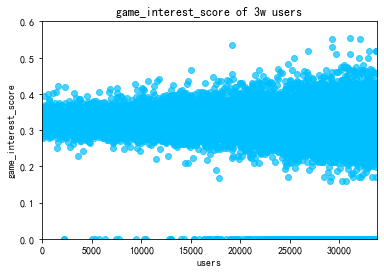

In [51]:
plt.xlim(0, len(df_tweet))
plt.ylim(0, 0.6)
plt.axis()
# ËÆæÁΩÆtitleÂíåxÔºåyËΩ¥ÁöÑlabel
plt.title("game_interest_score of 3w users")
plt.xlabel("users")
plt.ylabel("game_interest_score")
plt.scatter(np.arange(len(df_tweet)), df_tweet['score'],color='deepskyblue',alpha=0.7)
plt.show()

## min-maxÊ†áÂáÜÂåñÔºàMin-Max NormalizationÔºâ

### Âåñ‰∏∫0-1‰∏äÁöÑÂ∞èÊï∞

In [64]:
df_tweet['score_lin'] = df_tweet['score'].\
apply(lambda x: (x-score_min)/(score_max-score_min))

In [65]:
df_tweet['score_lin']

0        0.561965
1        0.576879
2        0.539502
3        0.584484
4        0.592604
           ...   
33785    0.654591
33786    0.622055
33787    0.606977
33788    0.511615
33789    0.461250
Name: score_lin, Length: 33790, dtype: float64

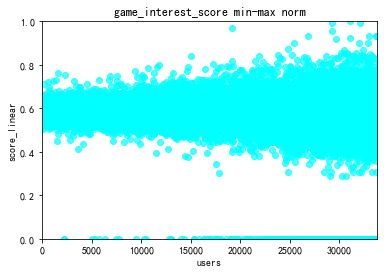

In [66]:
plt.xlim(0, len(df_tweet))
plt.ylim(0, 1)
plt.axis()
# ËÆæÁΩÆtitleÂíåxÔºåyËΩ¥ÁöÑlabel
plt.title("game_interest_score min-max norm")
plt.xlabel("users")
plt.ylabel("score_linear")
plt.scatter(np.arange(len(df_tweet)), df_tweet['score_lin'],color='cyan',alpha=0.7)
plt.show()

## z-scoreÊ†áÂáÜÂåñÔºàZ-score standardizationÔºâ

### Âåñ‰∏∫Ê†áÂáÜÊ≠£Â§™ÂàÜÂ∏É

In [57]:
df_tweet['score_std'] = df_tweet['score'].\
apply(lambda x: (x-score_mean)/score_std)
df_tweet['score_std']

0       -0.071827
1        0.068925
2       -0.283815
3        0.140697
4        0.217331
           ...   
33785    0.802336
33786    0.495279
33787    0.352975
33788   -0.547005
33789   -1.022325
Name: score_std, Length: 33790, dtype: float64

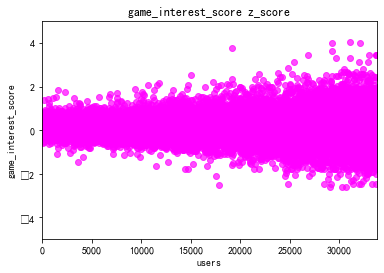

In [59]:
plt.xlim(0, len(df_tweet))
plt.ylim(-5, 5)
plt.axis()
# ËÆæÁΩÆtitleÂíåxÔºåyËΩ¥ÁöÑlabel
plt.title("game_interest_score z_score")
plt.xlabel("users")
plt.ylabel("game_interest_score")
plt.scatter(np.arange(len(df_tweet)), df_tweet['score_std'],color='magenta',alpha=0.7)
plt.show()

## È™åËØÅ

In [67]:
df_tweet

Unnamed: 0     user_id  \
0               0  1634847757   
1               1  6121645465   
2               2  5982298619   
3               3  2688638604   
4               4  7267921831   
...           ...         ...   
33785       33785  1860299730   
33786       33786  5608873136   
33787       33787  7592945242   
33788       33788  3805494971   
33789       33789  5515621596   

                                                 content  content_length  \
0        ËßâÈÜíÂπ¥‰ª£yydsÔºÅÔºÅÔºÅÔºÅÔºÅÔºÅ ËßâÈÜíÂπ¥‰ª£ËëõÊ†ëË¥µÁúüÂÆûÁöÑÁªìÂ±ÄËßâÈÜíÂπ¥‰ª£ ËÆ©ÂæàÂ§ö‰∫∫Áü•ÈÅì‰∫Ü‰∏Ä‰∏™‰ªéÊ≤°Âê¨...             999   
1      ÂìàÂìàÂìàÊâãÊú∫Á´ãÂàªÊääÈü≥ÈáèË∞ÉÂ∞è Â¶ÜÊïàÂ•ΩÁæéÂïä Â§™ÂèØÁà±‰∫ÜÂêß Áå™ÂßêÂ§™Áæé‰∫Ü    ÁúãÈ•ø‰∫Ü Âøç‰∏ç‰ΩèÔºÅ  ÁñØÁãÇ...             999   
2      Â∞ëÂπ¥Áªà‰ºöÂèòÊàêÂÖâÔºåÈ£ûÂæÄÊòüËæ∞Â§ßÊµ∑ Êàë‰πüË¶ÅÂä†Ê≤πÔΩû Èì≠ËÆ∞ÔºÅÈì≠ËÆ∞ÂéÜÂè≤ÔºÅÊ∞∏ÊÄÄÂÖàÁÉàÔºåÂêæËæàËá™Âº∫ÔºÅ ÊàëÈÖ∏‰∫Ü Áúü...             999   
3      Ê≤æ ‰∏≠ÂõΩÂÖ±‰∫ßÂÖö100Âπ¥ Âõ†‰∏∫ÂÅö‰∫ÜÂêÉÂäõ‰∏çËÆ®Â•ΩÁöÑ‰∫ãÊÉÖËßâÂæóÂ•ΩÈöæËøáÁù°‰∏çÁùÄÁúºÊ≥™ÈÉΩÊéâ‰∏ãÊù• ÁÑ∂ÂêéÂøòËÆ∞ÊíïÁöÑÂèå...             999   
4      2021Âπ¥Á¨¨26Âë® Êó©:Á∫¢Ë±ÜËñèÁ±≥Á≥ä+Â§±Ë¥•ÁöÑÂéöËõãÁÉßÔºà‰ΩÜÂë≥ÈÅìËÉΩÂêÉÔºâ ‰∏≠:ÁàÜÁÇíÈùûÂ∏∏+Á∫¢ËããËèú+ÈÖ±È∏≠ ...             999   
...                                                  ...             ...   
33785                                                qq                5   
33786                                              ÈÄèÈ£é                  5   
33787                                              Ê©òÂ≠êÂ∑•ÂéÇ                5   
33788                                              ÁéªÁíÉËÇ†ËÉÉ                5   
33789                                               Áè†Êµ∑                 4   

                                             content_seq  \
0      ['  ', 'ËßâÈÜí', 'ËßâÈÜí', 'ËëõÊ†ëË¥µ', 'ÁúüÂÆû', 'ÁªìÂ±Ä', 'ËßâÈÜí', 'Âæà...   
1      ['ÊâãÊú∫', 'Èü≥Èáè', 'Â¶ÜÊïà', 'Â•ΩÁæé', 'Áå™Âßê', '    ', '  ', '...   
2      ['È£ûÂæÄ', 'ÊòüËæ∞', 'Â§ßÊµ∑', 'Âä†Ê≤π', 'Èì≠ËÆ∞', 'Èì≠ËÆ∞', 'ÂéÜÂè≤', 'ÂÖàÁÉà...   
3      ['‰∏≠ÂõΩÂÖ±‰∫ßÂÖö', '100Âπ¥', 'ÂêÉÂäõ‰∏çËÆ®Â•Ω', 'Â•ΩÈöæËøá', 'ÁúºÊ≥™', 'Êéâ‰∏ãÊù•',...   
4      ['2021Âπ¥', 'Á¨¨26Âë®', 'Á∫¢Ë±Ü', 'ËñèÁ±≥Á≥ä+', 'Â§±Ë¥•', 'Âë≥ÈÅì', 'ÁàÜ...   
...                                                  ...   
33785                                       ['  ', 'qq']   
33786                                      ['ÈÄèÈ£é', '   ']   
33787                                       ['Ê©òÂ≠ê', 'Â∑•ÂéÇ']   
33788                                       ['ÁéªÁíÉ', 'ËÇ†ËÉÉ']   
33789                                       ['Áè†Êµ∑', '  ']   

                                          content_select     score  score_lin  \
0      ['  ', 'ËëõÊ†ëË¥µ', 'ÁªìÂ±Ä', 'ÂæàÂ§ö‰∫∫', 'ËëõÊ†ëË¥µ', 'ÈïøËæõÂ∫ó', '‰∫¨ÈÉä',...  0.311039   0.561965   
1      ['ÊâãÊú∫', 'Èü≥Èáè', 'Â¶ÜÊïà', 'Áå™Âßê', '    ', '  ', '  ', '...  0.319294   0.576879   
2      ['ÊòüËæ∞', 'Â§ßÊµ∑', 'ÂéÜÂè≤', 'ÂÖàÁÉà', 'ÂêæËæà', 'ÁäØËßÑ', '  ÂÖ±‰∫ßÂÖö', ...  0.298607   0.539502   
3      ['‰∏≠ÂõΩÂÖ±‰∫ßÂÖö', 'ÁúºÊ≥™', 'ÂèåÁúºÁöÆË¥¥', 'Â≠¶Âßê', 'ÊØï‰∏öÂÖ∏Á§º', 'ËàçÂèã', 'Ëàç...  0.323503   0.584484   
4      ['Á∫¢Ë±Ü', 'ËñèÁ±≥Á≥ä+', 'Âë≥ÈÅì', 'Á∫¢Ë±Ü', 'ËñèÁ±≥', 'Á≥äÂè£ÊÑü', 'ËèúÂçï', ...  0.327998   0.592604   
...                                                  ...       ...        ...   
33785                                       ['  ', 'qq']  0.362307   0.654591   
33786                                      ['ÈÄèÈ£é', '   ']  0.344299   0.622055   
33787                                       ['Ê©òÂ≠ê', 'Â∑•ÂéÇ']  0.335953   0.606977   
33788                                       ['ÁéªÁíÉ', 'ËÇ†ËÉÉ']  0.283171   0.511615   
33789                                       ['Áè†Êµ∑', '  ']  0.255295   0.461250   

       score_std  
0      -0.071827  
1       0.068925  
2      -0.283815  
3       0.140697  
4       0.217331  
...          ...  
33785   0.802336  
33786   0.495279  
33787   0.352975  
33788  -0.547005  
33789  -1.022325  

[33790 rows x 9 columns]

In [68]:
df_tweet.describe()

Unnamed: 0       user_id  content_length         score     score_lin  \
count  33790.000000  3.379000e+04    33790.000000  33790.000000  33790.000000   
mean   16894.500000  5.221382e+09      289.737763      0.315252      0.569575   
std     9754.477134  1.826283e+09      256.371244      0.058648      0.105962   
min        0.000000  9.539308e+06        4.000000      0.000000      0.000000   
25%     8447.250000  3.631319e+09       83.000000      0.307707      0.555944   
50%    16894.500000  5.682321e+09      200.000000      0.321312      0.580524   
75%    25341.750000  6.517056e+09      439.000000      0.337298      0.609408   
max    33789.000000  7.646379e+09      999.000000      0.553486      1.000000   

          score_std  
count  3.379000e+04  
mean  -2.614631e-14  
std    1.000015e+00  
min   -5.375364e+00  
25%   -1.286506e-01  
50%    1.033275e-01  
75%    3.759154e-01  
max    4.062128e+00

In [71]:
df_tweet.sort_values('score_lin',inplace=True,ascending=False)
df_tweet

Unnamed: 0     user_id  \
31127       31127  5506154974   
32045       32045  5641500411   
29302       29302  7194311249   
19128       19128  6066091469   
29270       29270  1900088170   
...           ...         ...   
25244       25244  5188532721   
26748       26748  5949849595   
10480       10480  7429216155   
33154       33154  5621488849   
30973       30973  2738012635   

                                                 content  content_length  \
31127                 ÂøôÁùÄÊâìÊ∏∏ÊàèÊí©Â∞èÂì•Âì• ‰∏çÊòØÂà∞ÊúÄÂêéÂ§ßÂÆ∂‰∏ÄËµ∑ÊääÊµ™Êº´ÊùÄÊ≠ªÔºåË∞Å‰πüÊ≤°ËßâÂæóÊä±Ê≠â„ÄÇ               34   
32045                         ÊòØ‰∏™Áé©ÂÆ∂  Áúã‰∏çÂá∫Â∑≤Áªè32‰∫ÜÂêß ‰ªäÂ§©Á©ø‰ªÄ‰πà Âú®Âé¶Èó®               26   
29302   Êë©Â∞îÂ∫ÑÂõ≠ ÂãæÂÖ´Áé©ÂÆ∂Ê±∂ÊÄé‰πà‰∫Ü ÊàëÂ∞±Êêû‰∏çÊáÇ‰∫Ü ËÄå‰∏îÊîπ‰∏ç‰∫Ü Âà∞Â∫ïÂï•Êó∂ÂÄôËÉΩÊîπÂïä ÊÄ•ÊÄ•ÊÄ• ÂèãÂèã‰ª¨ÊÄé‰πàÂäûÂïä               48   
19128  Â∑®Â•ΩÁ¨ë     ÂÜ≤    Â•ΩÊ∏©Êöñ  ÈôåÁîü‰∫∫ÂÆàÊä§ÁöÑÁ´•ÂøÉ  ËãçÂ§©ÂïäÂ§™ÊúâÁà±‰∫ÜÂêß  ËêΩÊ≥™‰∫ÜÂÆ∂‰∫∫‰ª¨  ...             160   
29270   Êó•Âä†Êª°ÁöÑÁõ¥Êí≠ÁÆÄÁõ¥Â§™ÁÅ´ÁàÜ‰∫ÜÔºåÂø´Êù•ÁúãÔºÅ 0ÁÇπÊä¢ÁàÜÊ¨æÂçïÂìÅ85Êäò http:t.cn/A6VCQ1v4               48   
...                                                  ...             ...   
25244   ‰ªäÂ§©ÊòØÊàëÁöÑÁîüÊó•07Êúà09Êó•ÔºåÊù•Á•ùÁ¶èÊàëÂêß~ 9ÂëΩÂïäÂ•ΩÈÖçÂïä  iKON (ÏïÑÏù¥ÏΩò)„ÄäGOODB...              83   
26748                 ‰∏çÂ•ΩÂêÉ   ÊúâÊòØÁ¥ØÁò´‰∫ÜÁöÑ‰∏ÄÂ§©   Â•ΩÂêÉÁöÑ‰∏çÂæó‰∫Ü   Êù•‰∏Ä‰ªΩÊ±üË•ø...              69   
10480  junoflo  junoflo junoflo  junoflo coooooool ju...             364   
33154                                     ‰ªäÂ§©ÊàëÂçáÁ∫ß‰∏∫VIP7‰∫Ü                 15   
30973                ÁúüÁöÑÂ•ΩÈöæÂèóÂì¶ Ë¢ÅÁà∑Áà∑ ‰∏ÄË∑ØËµ∞Â•Ωüôè Êï¥Ëµ∑ ÊàëÁöÑ‰∫î‰∏ÄÂ∞±ÊòØÂêÉÂêÉÂêÉ Êù•‰∫ÜÊù•‰∫Ü               35   

                                             content_seq  \
31127                    ['Ê∏∏Êàè', 'Â∞èÂì•Âì•', 'Êµ™Êº´', 'ÊùÄÊ≠ª', 'Êä±Ê≠â']   
32045                                       ['Áé©ÂÆ∂', '  ']   
29302                ['Êë©Â∞îÂ∫ÑÂõ≠', 'Áé©ÂÆ∂', 'Êêû‰∏çÊáÇ', 'ÊÄ•ÊÄ•ÊÄ•', 'ÂèãÂèã‰ª¨']   
19128  ['Â•ΩÁ¨ë     ÂÜ≤    Â•ΩÊ∏©Êöñ  ', 'ÂÆàÊä§ÁöÑÁ´•ÂøÉ  ËãçÂ§©ÂïäÂ§™ÊúâÁà±‰∫ÜÂêß  ', 'ËêΩÊ≥™...   
29270     ['Âä†Êª°', 'ÁÅ´ÁàÜ', '0ÁÇπ', 'ÁàÜÊ¨æ', '85Êäò', 'cn/A6VCQ1v4']   
...                                                  ...   
25244  ['ÊàëÁöÑÁîüÊó•', '07Êúà09Êó•', 'Âïä  iKON (ÏïÑÏù¥ÏΩò', 'GOODBYE RO...   
26748  ['               ‰∏çÂ•ΩÂêÉ   ', 'Á¥ØÁò´', '‰∏ÄÂ§©   ', '   '...   
10480  ['junoflo  junoflo junoflo  junoflo coooooool ...   
33154                              ['ÂçáÁ∫ß', 'VIP7', '   ']   
30973  ['ÁúüÁöÑÂ•ΩÈöæÂèó', 'Ë¢ÅÁà∑Áà∑', 'Ëµ∞Â•Ω', 'üôè ', 'Êï¥Ëµ∑', 'ÂêÉÂêÉÂêÉ', 'Êù•‰∫Ü'...   

                                          content_select     score  score_lin  \
31127                                      ['Ê∏∏Êàè', 'Â∞èÂì•Âì•']  0.553486   1.000000   
32045                                       ['Áé©ÂÆ∂', '  ']  0.550230   0.994117   
29302                              ['Êë©Â∞îÂ∫ÑÂõ≠', 'Áé©ÂÆ∂', 'ÂèãÂèã‰ª¨']  0.550230   0.994117   
19128                               ['ÂÆ∂‰∫∫‰ª¨', '  ', 'ÂπïÊòüÁ§æ']  0.535462   0.967435   
29270                              ['ÁàÜÊ¨æ', 'cn/A6VCQ1v4']  0.529693   0.957012   
...                                                  ...       ...        ...   
25244                     ['ÊàëÁöÑÁîüÊó•', 'GOODBYE ROAD', '  ']  0.000000   0.000000   
26748                                      ['   ', '  ']  0.000000   0.000000   
10480  ['junoflo  junoflo junoflo  junoflo coooooool ...  0.000000   0.000000   
33154                                    ['VIP7', '   ']  0.000000   0.000000   
30973                                      ['Ë¢ÅÁà∑Áà∑', 'üôè ']  0.000000   0.000000   

       score_std  
31127   4.062128  
32045   4.006606  
29302   4.006606  
19128   3.754801  
29270   3.656432  
...          ...  
25244  -5.375364  
26748  -5.375364  
10480  -5.375364  
33154  -5.375364  
30973  -5.375364  

[33790 rows x 9 columns]

In [72]:
df_tweet.to_csv('3.3wÁî®Êà∑Ê∏∏ÊàèÂÖ¥Ë∂£È¢ÑÊµã.csv')

ÈÄöËøáÂØπÁî®Êà∑ÂéüÂàõÂ∏ñÂ≠êÁöÑÂõûÊ∫ØÔºåÂèØ‰ª•ÂèëÁé∞Áî®Êà∑Áæ§‰Ωì‰∏≠Ôºå‰∏éÊ∏∏ÊàèÁõ∏ÂÖ≥ÁöÑÂ∏ñÂ≠êËæÉÂ∞ëÔºåËÄåÂá∫Áé∞Ê∏∏ÊàèÁõ∏ÂÖ≥ÂÜÖÂÆπÁöÑÂ∏ñÂ≠êÔºåÂÖ∂Ê∏∏ÊàèÂÖ¥Ë∂£È¢ÑÊµãÂÄºÊôÆÈÅçËæÉÈ´ò„ÄÇ

ÂèçËøáÊù•ÔºåÊ∏∏ÊàèÂÖ¥Ë∂£È¢ÑÊµãÂÄºÊúÄÈ´òÁöÑ‰∫∫Áæ§ÔºåÂπ∂‰∏çÈÉΩÊòØÂá∫Áé∞Ê∏∏ÊàèÁõ∏ÂÖ≥ÁöÑÂÜÖÂÆπ„ÄÇ

ÈÄöËøáÂú®Ê∏∏ÊàèÂÖ¥Ë∂£È¢ÑÊµãÂÄºÊúÄÈ´òÁöÑ‰∫∫Áæ§‰∏≠ËøõË°åÁ≠õÈÄâÔºåÂèØ‰ª•ÊâæÂà∞ËØ•Áî®Êà∑Áæ§‰Ωì‰∏≠ÂØπÊ∏∏ÊàèËæÉÊÑüÂÖ¥Ë∂£ÁöÑ‰∫∫Áæ§„ÄÇ